# Import

In [21]:
import rasterio
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import statistics

from IAdeforestation.preprocessing import *
from IAdeforestation.training import eurosat_params, vietnam_params

# Band Variaiton between class
## Box plot

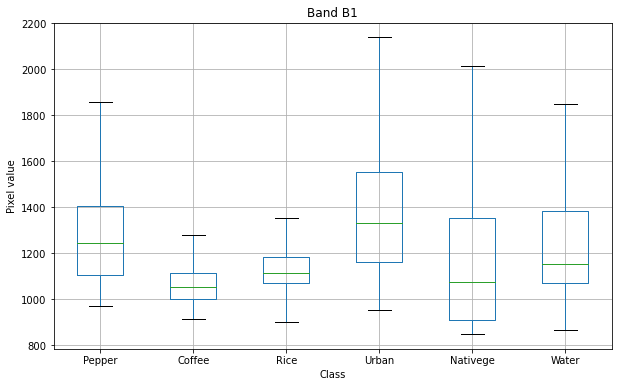

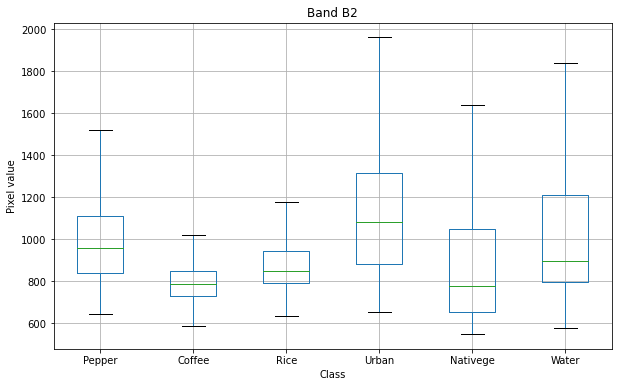

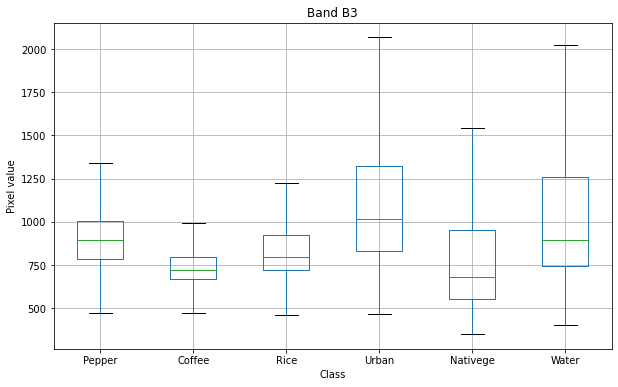

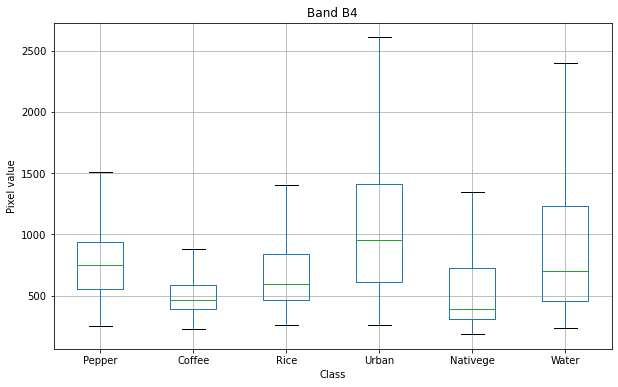

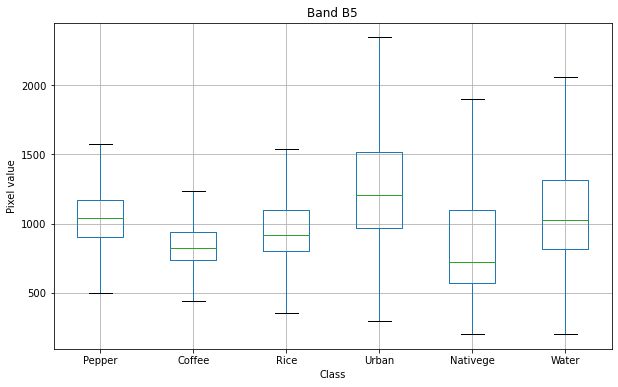

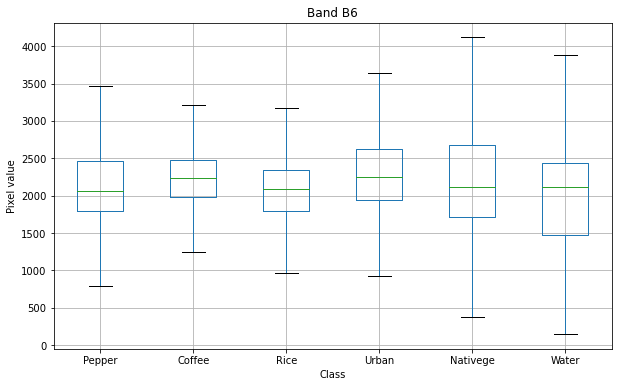

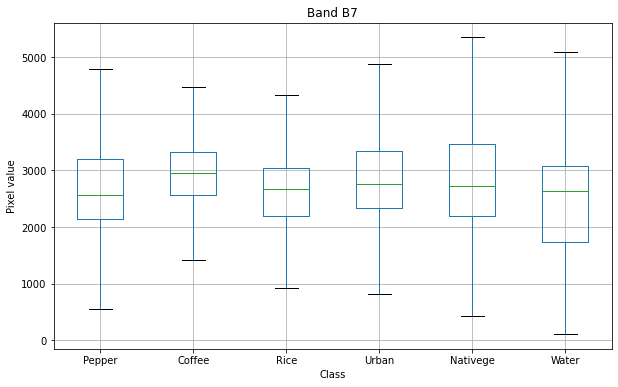

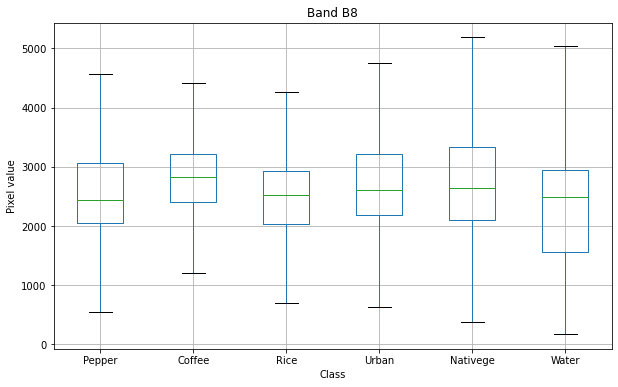

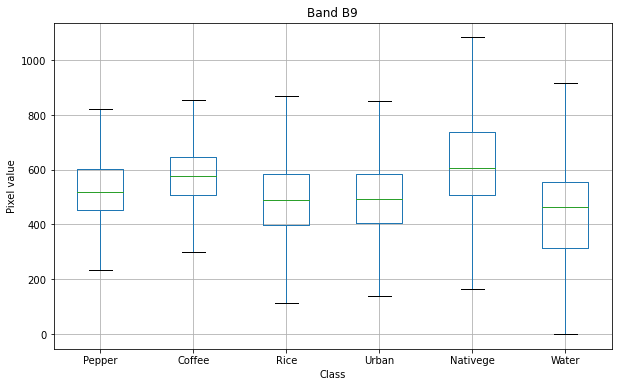

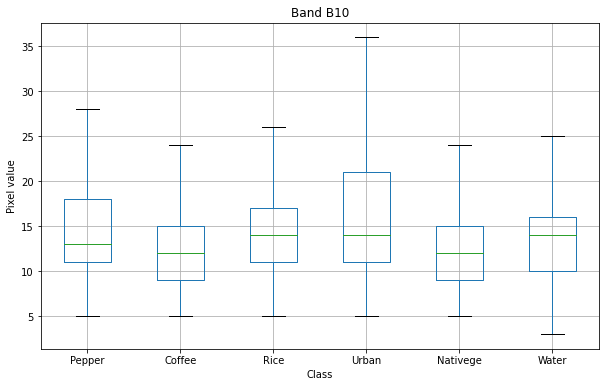

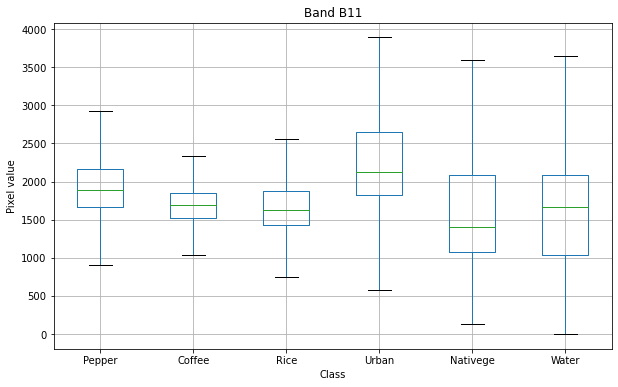

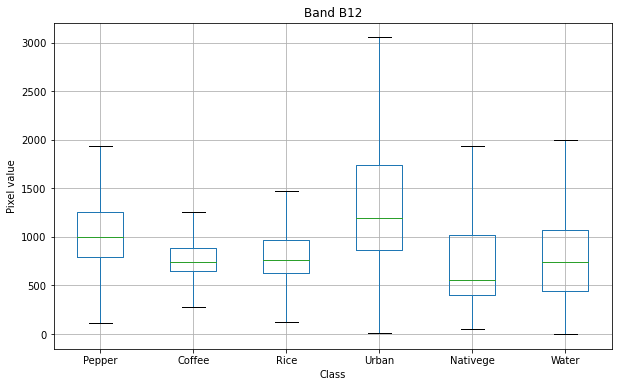

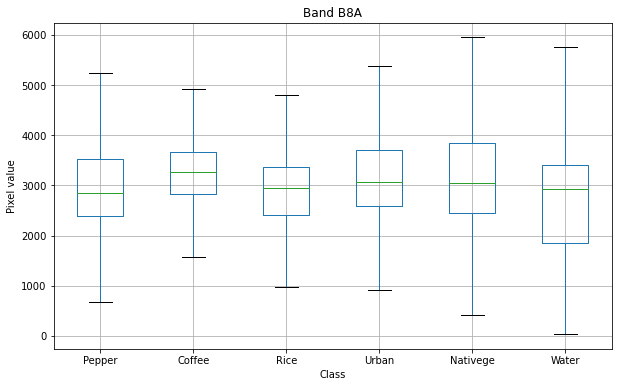

In [15]:
categories = {'Pepper':15, 'Coffee':2, 'Rice':18, 'Urban':9, 'Nativege':4, 'Water':10}
dict_output = {}
for cat, number in categories.items():
    dict_output[cat] = {}
    
    for band in range(0,13):
        dict_output[cat][band] = []
    
    for path in os.listdir(os.path.join('images', str(number)))[0:50]:
        img = np.float32(rasterio.open(os.path.join('images', str(number),path)).read())
        img = np.float32(np.moveaxis(img, 0, -1))

        for band in range(0,13):
            dict_output[cat][band].extend(img[:,:,band].flatten())
            
for band in range(0,13):
    df = pd.DataFrame()
    for cat,number in categories.items():
        df[cat] = dict_output[cat][band]
    
    fig, ax = plt.subplots(figsize=(10,6))
    df.boxplot(ax=ax, showfliers=False)
    
    ax.set_xlabel("Class")
    ax.set_ylabel("Pixel value")
    
    if band != 12:
        ax.set_title(f"Band B{band+1}")
    else:
        ax.set_title(f"Band B8A")
    

## Heatmap

Text(0.5, 1.0, 'Band mean per image class')

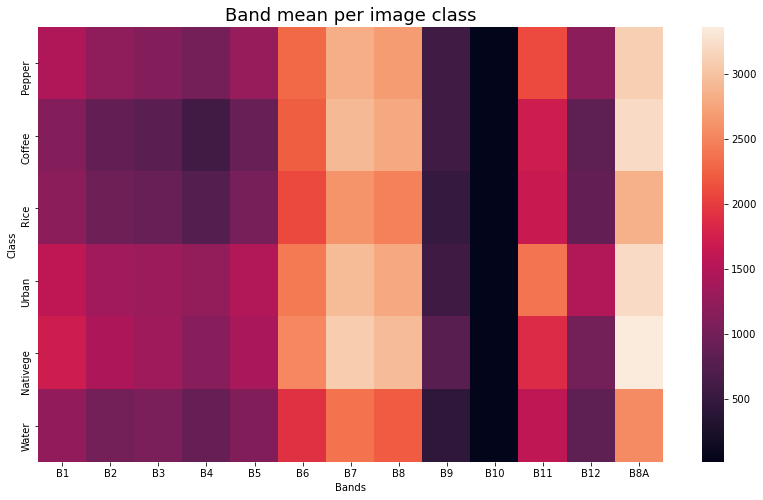

In [17]:
df = pd.DataFrame(columns=range(0,13), index=[list(dict_output.keys())])
for band in range(0,13):

    mean =[]
    for cat,number in categories.items():
        mean.append(statistics.mean(dict_output[cat][band]))
    df[band] = mean
                         
fig, ax = plt.subplots(figsize=(14,8))

labels = ["B" + str(i) for i in range(1,13)]
labels.append("B8A")
    
sns.heatmap(df, ax=ax, xticklabels=labels)
ax.set_xlabel('Bands')
ax.set_ylabel('Class')
ax.set_title('Band mean per image class', fontsize=18)

# Band pixel histograms
## Eurosat params

In [22]:
paths = []
for cat, number in categories.items():
    for path in os.listdir(os.path.join('images', str(number)))[0:50]:
        paths.append(os.path.join('images', str(number), path))

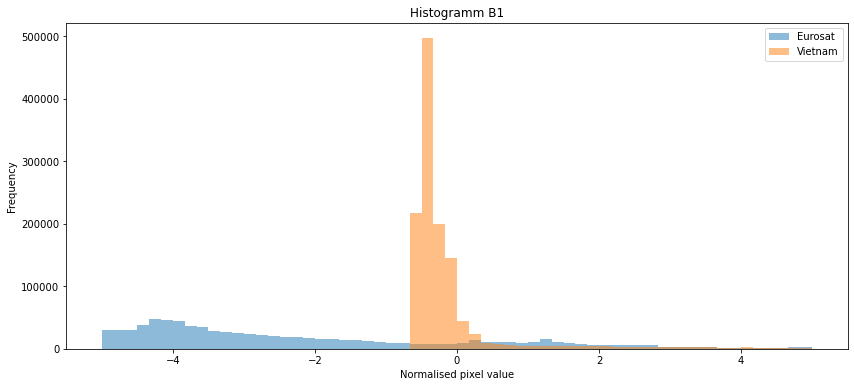

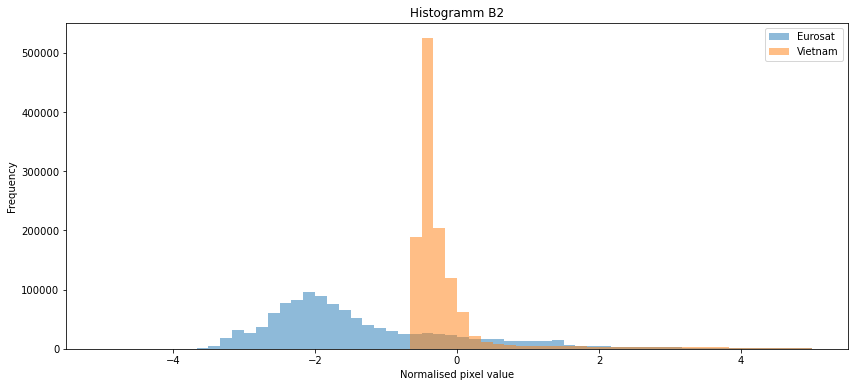

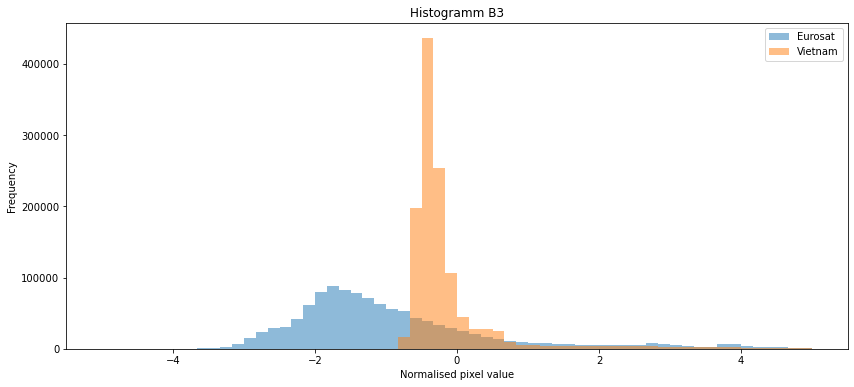

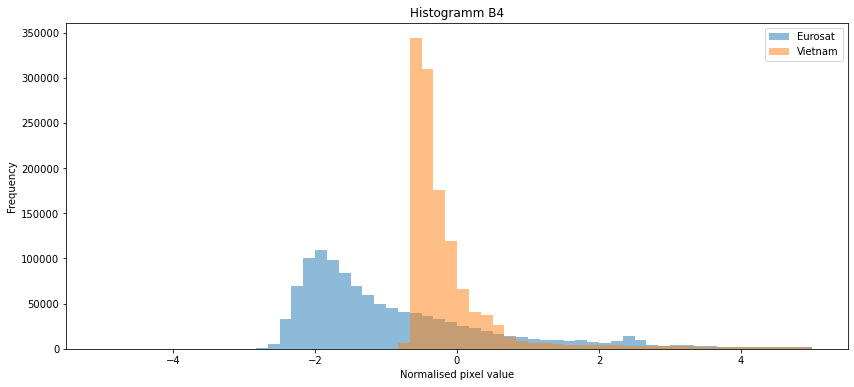

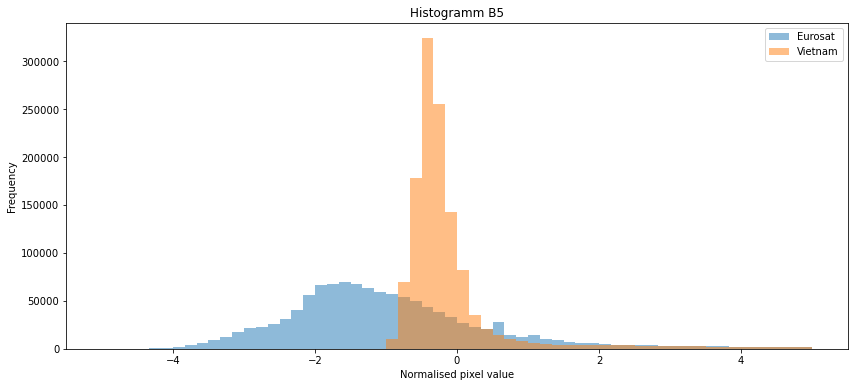

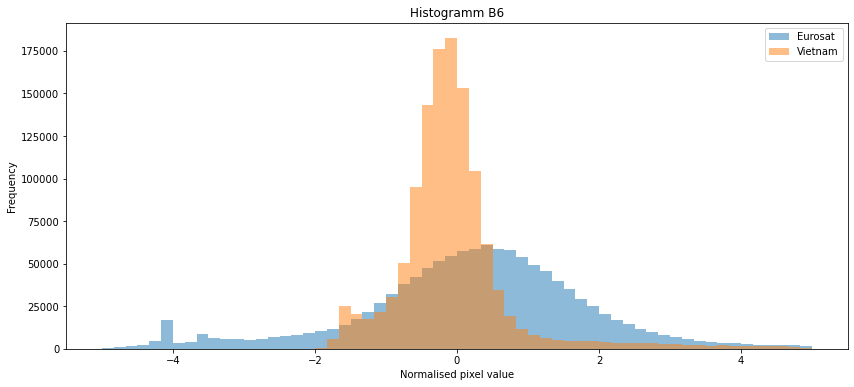

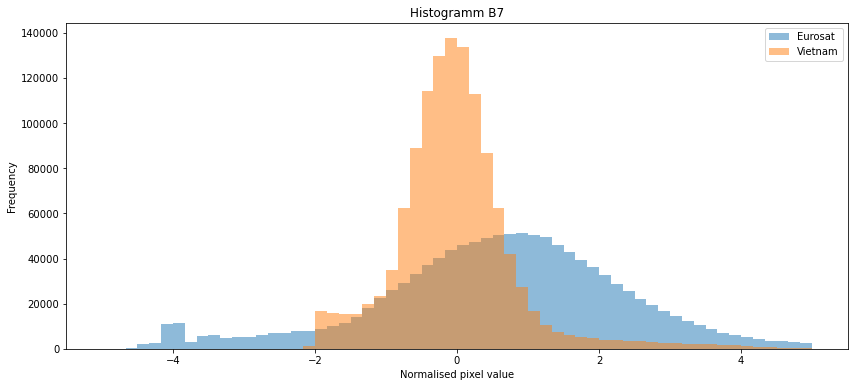

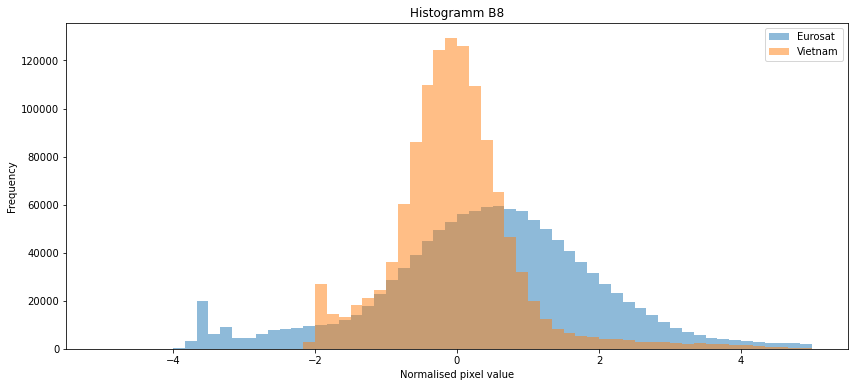

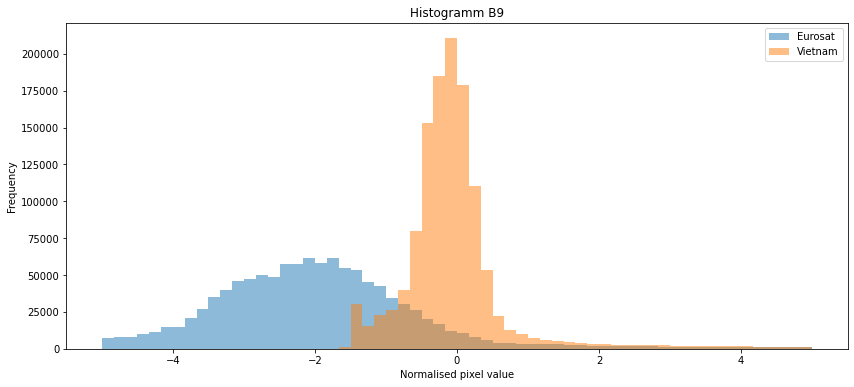

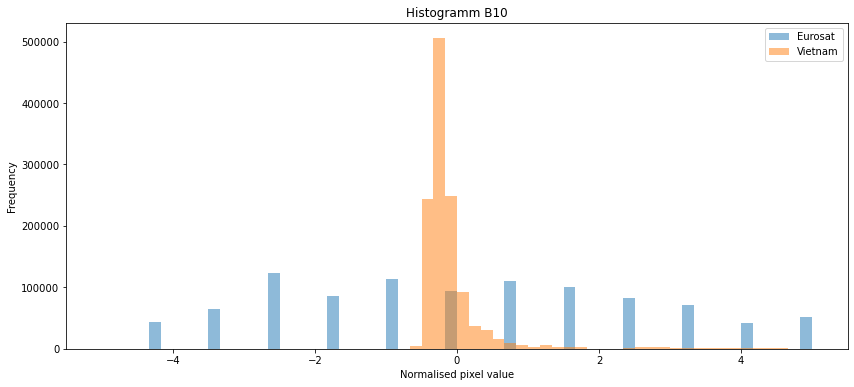

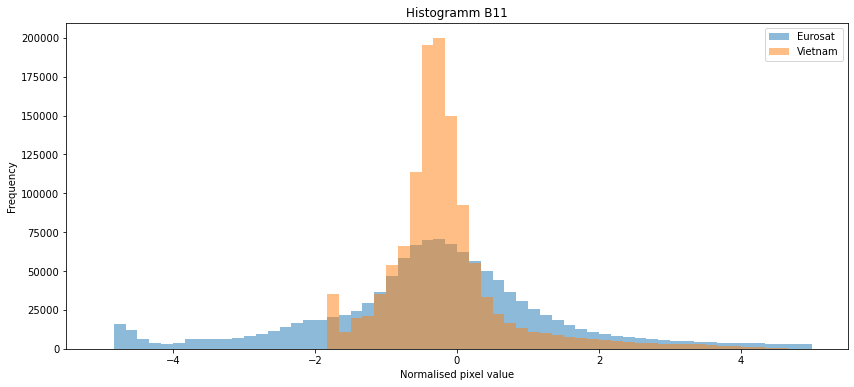

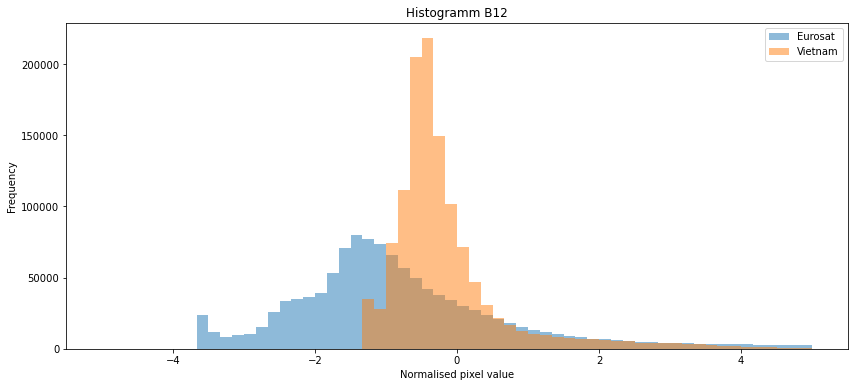

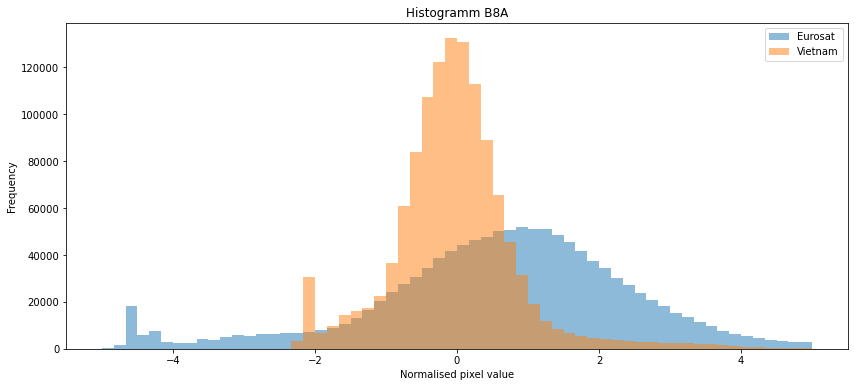

In [24]:
dict_bands_eurosat = {}
dict_bands_vietnam = {}

for band in range(0,13):
    dict_bands_eurosat[band] = []
    dict_bands_vietnam[band] = []
        
for path in paths:
    img = np.float32(rasterio.open(path).read())
    img_eurosat = np.moveaxis(img, 0, -1)
    img_vietnam = img_eurosat.copy()
    img_eurosat = normalize(img_eurosat, eurosat_params['mean'], eurosat_params['std'])
    
    
    img_vietnam = normalize(img_vietnam, vietnam_params['mean'], vietnam_params['std'])
    
    for band in range(0,13):
        dict_bands_eurosat[band].extend(img_eurosat[:,:,band].flatten())
        dict_bands_vietnam[band].extend(img_vietnam[:,:,band].flatten())
        
for n, v in dict_bands_eurosat.items():
    fig, ax = plt.subplots(figsize=(14,6))
    ax.hist(dict_bands_eurosat[n], range=[-5,5], bins=60, label="Eurosat", alpha=0.5)
    ax.hist(dict_bands_vietnam[n], range=[-5,5], bins=60, label="Vietnam", alpha=0.5)
    ax.legend()
    ax.set_xlabel("Normalised pixel value")
    ax.set_ylabel("Frequency")
    
    if n != 12:
        ax.set_title(f"Histogramm B{n+1}")
    else:
        ax.set_title(f"Histogramm B8A")